In [426]:
from align import *

In [294]:
landmarks_model_path = unpack_bz2(
        get_file(
            'http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2',
            'temp/shape_predictor_68_face_landmarks.dat.bz2'))

ALIGNED_IMAGES_DIR = 'imgs_test_align'
PROCESSED_IMAGES_DIR = 'imgs_test_processing'
if not osp.exists(PROCESSED_IMAGES_DIR): os.makedirs(PROCESSED_IMAGES_DIR)

files = os.listdir(ALIGNED_IMAGES_DIR)
print(f'total img files {len(files)}')

lm_parts = {}
lms = {}
landmarks_detector = LandmarksDetector(landmarks_model_path)
for img_name in files:
    raw_img_path = os.path.join(ALIGNED_IMAGES_DIR, img_name)
    print('img_name:', img_name)
    for i, face_landmarks in enumerate(
            landmarks_detector.get_landmarks(raw_img_path),
            start=1):
        
        lms[img_name] = face_landmarks
        
        lm_parts['lm'] = np.array(face_landmarks)
        lm_parts['lm_chin'] = lm[0:17]  # left-right
        lm_parts['lm_eyebrow_left'] = lm[17:22]  # left-right
        lm_parts['lm_eyebrow_right'] = lm[22:27]  # left-right
        lm_parts['lm_nose'] = lm[27:31]  # top-down
        lm_parts['lm_nostrils'] = lm[31:36]  # top-down
        lm_parts['lm_eye_left'] = lm[36:42]  # left-clockwise
        lm_parts['lm_eye_right'] = lm[42:48]  # left-clockwise
        lm_parts['lm_mouth_outer'] = lm[48:60]  # left-clockwise
        lm_parts['lm_mouth_inner'] = lm[60:68]  # left-clockwise

        # # Calculate auxiliary vectors.
        # eye_left = np.mean(lm_eye_left, axis=0)
        # eye_right = np.mean(lm_eye_right, axis=0)
        # eye_avg = (eye_left + eye_right) * 0.5
        # eye_to_eye = eye_right - eye_left
        # mouth_left = lm_mouth_outer[0]
        # mouth_right = lm_mouth_outer[6]
        # mouth_avg = (mouth_left + mouth_right) * 0.5
        # eye_to_mouth = mouth_avg - eye_avg
                
# print(lm_parts['lm_chin'])


cached
cached
total img files 3
img_name: sandy.png
img_name: yotaka_default.png
img_name: yotaka_smile.png


In [296]:
src = 'imgs_test_align/yotaka_default.png'
img_name = os.path.basename(src)

lm_chin = np.array(lms[img_name][0:17])  # left-right
lm_eyebrow_left = np.array(lms[img_name][17:22])  # left-right
lm_eyebrow_right = np.array(lms[img_name][22:27])  # left-right
lm_nose = np.array(lms[img_name][27:31])  # top-down
lm_nostrils = np.array(lms[img_name][31:36])  # top-down
lm_eye_left = np.array(lms[img_name][36:42])  # left-clockwise
lm_eye_right = np.array(lms[img_name][42:48])  # left-clockwise
lm_mouth_outer = np.array(lms[img_name][48:60])  # left-clockwise
lm_mouth_inner = np.array(lms[img_name][60:68])  # left-clockwise

lm_eye_left_max = np.max(lm_eye_left, axis=0)+np.array([8,10])
lm_eye_left_min = np.min(lm_eye_left, axis=0)-np.array([13,8])
lm_eye_left_size = lm_eye_left_max - lm_eye_left_min
# lm_eye_left_rec: left-top(x,y), size(w,h) 
lm_eye_left_rec = np.concatenate([lm_eye_left_min, lm_eye_left_size])

lm_eye_right_max = np.max(lm_eye_right, axis=0)+np.array([13,8])
lm_eye_right_min = np.min(lm_eye_right, axis=0)-np.array([8,10])
lm_eye_right_size = lm_eye_right_max - lm_eye_right_min 
lm_eye_right_rec = np.concatenate([lm_eye_right_min, lm_eye_right_size])

lm_eye_max = np.max((lm_eye_left_max, lm_eye_right_max), axis=0)
lm_eye_min = np.min((lm_eye_left_min, lm_eye_right_min), axis=0)
lm_eye_size = lm_eye_max - lm_eye_min
lm_eye_rec = np.concatenate([lm_eye_min, lm_eye_size])

lm_mouth = lm_mouth_outer
lm_mouth_max = np.max(lm_mouth, axis=0)+np.array([8,10])
lm_mouth_min = np.min(lm_mouth, axis=0)-np.array([13,8])
lm_mouth_size = lm_mouth_max - lm_mouth_min
# lm_mouth_rec: left-top(x,y), size(w,h) 
lm_mouth_rec = np.concatenate([lm_mouth_min, lm_mouth_size])

In [393]:
lm_eye2eyebrow_left = np.concatenate([lm_eye_left, lm_eyebrow_left])
lm_eye2eyebrow_left_max = np.max(lm_eye2eyebrow_left, axis=0)+np.array([5,10])
lm_eye2eyebrow_left_min = np.min(lm_eye2eyebrow_left, axis=0)-np.array([5,5])
lm_eye2eyebrow_left_size = lm_eye2eyebrow_left_max - lm_eye2eyebrow_left_min
lm_eye2eyebrow_left_rec = np.concatenate([lm_eye2eyebrow_left_min, lm_eye2eyebrow_left_size])

lm_eye2eyebrow_right = np.concatenate([lm_eye_right, lm_eyebrow_right])
lm_eye2eyebrow_right_max = np.max(lm_eye2eyebrow_right, axis=0)+np.array([5,10])
lm_eye2eyebrow_right_min = np.min(lm_eye2eyebrow_right, axis=0)-np.array([5,5])
lm_eye2eyebrow_right_size = lm_eye2eyebrow_right_max - lm_eye2eyebrow_right_min
lm_eye2eyebrow_right_rec = np.concatenate([lm_eye2eyebrow_right_min, lm_eye2eyebrow_right_size])

lm_eye2eyebrow_max = np.max((lm_eye2eyebrow_left_max, lm_eye2eyebrow_right_max), axis=0)
lm_eye2eyebrow_min = np.min((lm_eye2eyebrow_left_min, lm_eye2eyebrow_right_min), axis=0)
lm_eye2eyebrow_size = lm_eye2eyebrow_max - lm_eye2eyebrow_min
lm_eye2eyebrow_rec = np.concatenate([lm_eye2eyebrow_min, lm_eye2eyebrow_size])
lm_eye2eyebrow_rec_center = lm_eye2eyebrow_min + lm_eye2eyebrow_size/2

In [394]:
lm_nose2mouth = np.concatenate([np.array(lms[img_name][30:36]), lm_mouth])

lm_nose2mouth_max = np.max(lm_nose2mouth, axis=0)+np.array([15,10])
lm_nose2mouth_min = np.min(lm_nose2mouth, axis=0)-np.array([15,5])
lm_nose2mouth_size = lm_nose2mouth_max - lm_nose2mouth_min
lm_nose2mouth_rec = np.concatenate([lm_nose2mouth_min, lm_nose2mouth_size])
lm_nose2mouth_rec_center = lm_nose2mouth_min + lm_nose2mouth_size/2

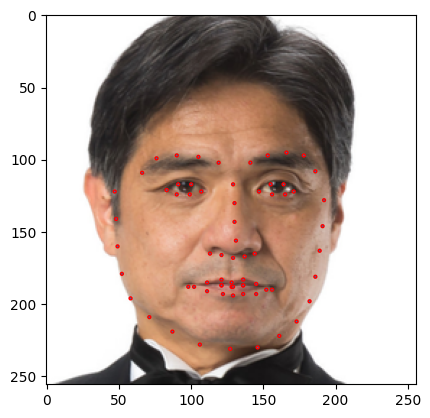

In [284]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

img = PIL.Image.open(src)
# img = PIL.Image.open('imgs_test_align/yotaka_smile.png')

fig,ax = plt.subplots()
for lm in lms[img_name]:
    r = patches.Circle(xy=lm, radius=1, ec='r')
    ax.add_patch(r)

ax.imshow(img)

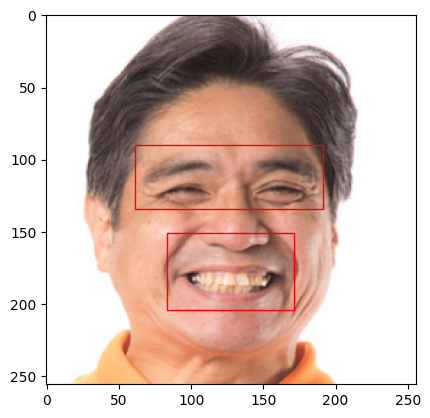

In [331]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# img = PIL.Image.open(src)
img = PIL.Image.open('imgs_test_align/yotaka_smile.png')

fig,ax = plt.subplots()
rects = []
# rects.append(patches.Rectangle(
#         xy=lm_eye_left_rec[:2],
#         width=lm_eye_left_rec[2],
#         height=lm_eye_left_rec[3],
#         ec='r',
#         fill=False))
# rects.append(patches.Rectangle(
#         xy=lm_eye_right_rec[:2],
#         width=lm_eye_right_rec[2],
#         height=lm_eye_right_rec[3],
#         ec='r',
#         fill=False))

# rects.append(patches.Rectangle(
#         xy=lm_eye_rec[:2],
#         width=lm_eye_rec[2],
#         height=lm_eye_rec[3],
#         ec='r',
#         fill=False))

# rects.append(patches.Rectangle(
#         xy=lm_mouth_rec[:2],
#         width=lm_mouth_rec[2],
#         height=lm_mouth_rec[3],
#         ec='r',
#         fill=False))

# rects.append(patches.Rectangle(
#         xy=lm_eye2eyebrow_left_rec[:2],
#         width=lm_eye2eyebrow_left_rec[2],
#         height=lm_eye2eyebrow_left_rec[3],
#         ec='r',
#         fill=False))

# rects.append(patches.Rectangle(
#         xy=lm_eye2eyebrow_right_rec[:2],
#         width=lm_eye2eyebrow_right_rec[2],
#         height=lm_eye2eyebrow_right_rec[3],
#         ec='r',
#         fill=False))

rects.append(patches.Rectangle(
        xy=lm_eye2eyebrow_rec[:2],
        width=lm_eye2eyebrow_rec[2],
        height=lm_eye2eyebrow_rec[3],
        ec='r',
        fill=False))

rects.append(patches.Rectangle(
        xy=lm_nose2mouth_rec[:2],
        width=lm_nose2mouth_rec[2],
        height=lm_nose2mouth_rec[3],
        ec='r',
        fill=False))

for r in rects:
    ax.add_patch(r)

ax.imshow(img)

In [420]:
import cv2
img = cv2.imread('imgs_test_align/yotaka_default.png')
img_eye_crop = img[lm_eye2eyebrow_min[1]:lm_eye2eyebrow_max[1], lm_eye2eyebrow_min[0]:lm_eye2eyebrow_max[0]]
img_mouth_crop = img[lm_nose2mouth_min[1]:lm_nose2mouth_max[1], lm_nose2mouth_min[0]:lm_nose2mouth_max[0]]

# img_white_eye_crop = np.copy(img_eye_crop)
# img_white_eye_crop[:] = 255
# img_white_mouth_crop = np.copy(img_mouth_crop)
# img_white_mouth_crop[:] = 255
img_eye_mask = np.copy(img)
img_mouth_mask = np.copy(img)
img_eye_mask[lm_eye2eyebrow_min[1]:lm_eye2eyebrow_max[1], lm_eye2eyebrow_min[0]:lm_eye2eyebrow_max[0]] = 255
img_mouth_mask[lm_nose2mouth_min[1]:lm_nose2mouth_max[1], lm_nose2mouth_min[0]:lm_nose2mouth_max[0]] = 255

img_mask = np.copy(img_eye_mask)
img_mask[lm_nose2mouth_min[1]:lm_nose2mouth_max[1], lm_nose2mouth_min[0]:lm_nose2mouth_max[0]] = 255

path_white_eye_crop = PROCESSED_IMAGES_DIR+'/white_eye_crop.png'
path_white_mouth_crop = PROCESSED_IMAGES_DIR+'/white_mouth_crop.png'
path_eye_crop = PROCESSED_IMAGES_DIR+'/yotaka_smile_eye_crop.png'
path_mouth_crop = PROCESSED_IMAGES_DIR+'/yotaka_smile_mouth_crop.png'
path_mask = PROCESSED_IMAGES_DIR+'/yotaka_smile_mask.png'
path_eye_mask = PROCESSED_IMAGES_DIR+'/yotaka_default_eye_mask.png'
path_mouth_mask = PROCESSED_IMAGES_DIR+'/yotaka_default_mouth_mask.png'

# cv2.imwrite(path_white_eye_crop, img_white_eye_crop)
# cv2.imwrite(path_white_mouth_crop, img_white_mouth_crop)
# cv2.imwrite(path_eye_crop, img_eye_crop)
# cv2.imwrite(path_mouth_crop, img_mouth_crop)
# cv2.imwrite(path_mask, img_mask)
# cv2.imwrite(path_eye_mask, img_eye_mask)
# cv2.imwrite(path_mouth_mask, img_mouth_mask)

# cv2.imshow('image',img_mouth_crop)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [430]:
# center = lm_eye2eyebrow_rec_center.astype(int)
center = lm_nose2mouth_rec_center.astype(int)

crop_path = 'imgs_test_processing/white_mouth_crop.png'
img_path = 'imgs_test_processing/yotaka_smile_eye_seamless.png'
img = cv2.imread(img_path)
crop = cv2.imread(crop_path)
crop_mask = 255 * np.ones(crop.shape, crop.dtype)

output = cv2.seamlessClone(crop, img, crop_mask, center, cv2.NORMAL_CLONE)

cv2.imwrite('imgs_test_processing/yotaka_smile_pose_seamless.png', output)

cv2.imshow('image',output)
cv2.waitKey(0)
cv2.destroyAllWindows()